## Moving Window Functions
* sometimes we want to do manipulation on a chunk of a dataframe by time period, e.g. 5 mins, instead of using groups
* we can do this by just indexing into the dataframe with a date range comparison
* let's look at examples on the stock market with amazon


In [1]:
import pandas as pd
df = pd.read_csv("datasets/AMZN.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


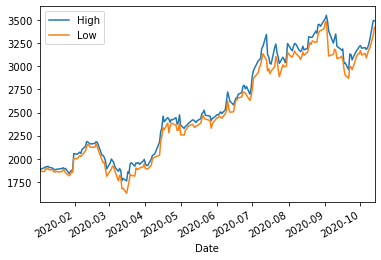

In [3]:
%matplotlib inline
# Let's look at the highs and lows
amzn=df[["High","Low"]].set_index(pd.to_datetime(df["Date"]))
# just by this year
amzn=amzn[amzn.index> '2020-01-01']
import matplotlib.pyplot as plt
amzn.plot()
# notice we have two lines!

* The `rolling()` operator lets us specify a window size and apply a function that works on that much data to every point in our time series
* Close your eyes and imagine now one of those stock prices over time. How would we calculate the 7 day moving average?
* First, what does the 7 day moving average even mean?


* Now, what's the algorithm you would use to calculate it?

In [4]:
import numpy as np
for i in range(7,len(amzn)):
    print(np.mean(amzn.iloc[i-7:i]["High"]))

#a loop. ickers.

1905.364257714286
1905.3628277142857
1905.4928325714286
1901.945696
1897.9028318571425
1894.4228339999997
1891.0585588571428
1890.4242815714283
1889.2785644285711
1890.4042794285713
1884.9957101428572
1881.0699985714284
1879.371425
1876.3142785714288
1898.2028458571433
1920.848563
1944.392857142857
1977.25286
2005.5657262857142
2037.5343018571425
2075.067173714285
2093.6714565714287
2112.492885142857
2128.2757394285713
2140.850027857143
2156.5314591428573
2168.8986118571424
2174.782889142857
2168.868617428571
2148.7329101428572
2129.3500454285713
2108.725760428571
2081.4300364285714
2039.2385952857144
2007.4843054285716
1986.3100064285716
1977.5528565714285
1966.9985701428573
1952.1699917142857
1936.1371374285716
1936.7814245714285
1924.8971297142857
1891.849993142857
1864.4657158571426
1835.7128558571428
1828.128575
1825.1128627142857
1832.3600027142857
1844.6000104285715
1866.6571567142857
1890.7557197142858
1918.0142995714286
1932.1157225714285
1946.1342947142857
1950.224295428571
1

* In pandas, the `rolling` function allows us to do this with arbitrary window sizes and a function

In [5]:
# Here, let's do a 7 day rolling on the dataframe
# Note the output we get back
amzn.rolling(7).apply(np.mean)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


,High,Low
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
2020-01-10,1905.364258,1877.561436
2020-01-13,1905.362828,1879.940011
2020-01-14,1905.492833,1879.090018


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


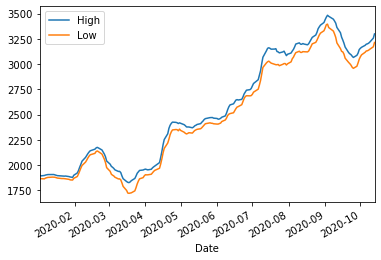

In [6]:
# there are the usual benefits (faster, less error prone, not icky) versus iteration
# we can also control those nan's by specifying how much data we want to be present
# before applying the function
amzn.rolling(7,min_periods=1).apply(np.mean).plot()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


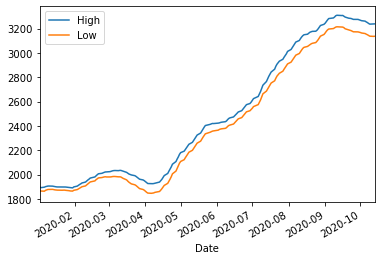

In [7]:
# here's a 30 day moving average
amzn.rolling(30,min_periods=1).apply(np.mean).plot()

# Time Series and Gaps
What do we do when we have missing data in a time series?

In [8]:
import pandas as pd
# let's look at some data reported cases of measles in England and Wales
df=pd.read_csv("datasets/ewcitmeas.txt", delim_whitespace=True, dtype=float, na_values="*")
df.head()

,DD,MM,YY,London,Bristol,Liverpool,Manchester,Newcastle,Birmingham,Sheffield
0,10.0,1.0,48.0,NaN,3.0,40.0,22.0,58.0,78.0,9.0
1,17.0,1.0,48.0,240.0,4.0,51.0,19.0,52.0,84.0,11.0
2,24.0,1.0,48.0,284.0,3.0,54.0,23.0,34.0,65.0,11.0
3,31.0,1.0,48.0,340.0,5.0,54.0,31.0,25.0,106.0,4.0
4,7.0,2.0,48.0,511.0,1.0,89.0,66.0,27.0,142.0,7.0


In [9]:
# what a painful date time format! Welcome to my world!
df.rename(columns={'DD': 'day', 'MM': 'month', 'YY': 'year'}, inplace=True)
df['year'] = df['year'] + 1900
df=df.set_index(pd.to_datetime(df[['year', 'month', 'day']])).drop(["day","month","year"], axis='columns')
df.head()

,London,Bristol,Liverpool,Manchester,Newcastle,Birmingham,Sheffield
1948-01-10,NaN,3.0,40.0,22.0,58.0,78.0,9.0
1948-01-17,240.0,4.0,51.0,19.0,52.0,84.0,11.0
1948-01-24,284.0,3.0,54.0,23.0,34.0,65.0,11.0
1948-01-31,340.0,5.0,54.0,31.0,25.0,106.0,4.0
1948-02-07,511.0,1.0,89.0,66.0,27.0,142.0,7.0


In [10]:
%matplotlib inline
# we can setup some features for matplotlib here
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 12, 8

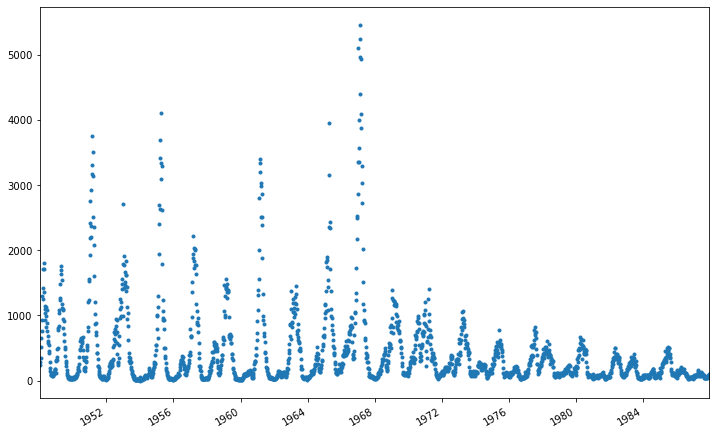

In [11]:
# instead of the line plots we have been using, let's look at a scatter plot
df["London"].plot(style=".")

* We notice several things here, first, the seasonality of the measels is shown. Second that the resultion of weekly makes sense sometimes, but at other times it seems like we could be helped with more frequent data collection

In [12]:
# I want to show you how to deal with holes in your data
# I'm just going to pull out 500 obsertvations as an example into a new dataframe
df2=df["London"].sample(500)
# Now, look at the randomness of dates/values in the dataframe itself
display(df2.head())

1967-10-13      72.0
1987-12-11      95.0
1948-12-18     180.0
1971-09-10      92.0
1949-03-19    1231.0
Name: London, dtype: float64

In [13]:
# One way of filling holes is to resample and forward fill values
df_ffill=df2.resample("D").fillna(method="ffill")
df_ffill.head()

1948-01-31    340.0
1948-02-01    340.0
1948-02-02    340.0
1948-02-03    340.0
1948-02-04    340.0
Freq: D, Name: London, dtype: float64

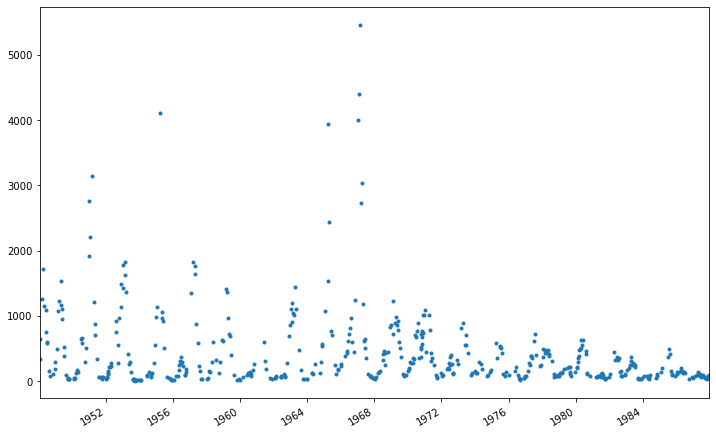

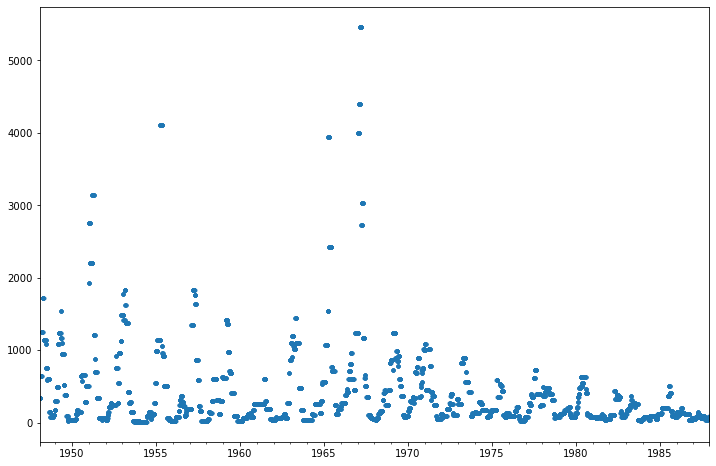

In [14]:
#let's compare these two
df2.plot(style=".")
plt.figure()
df_ffill.plot(style=".")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


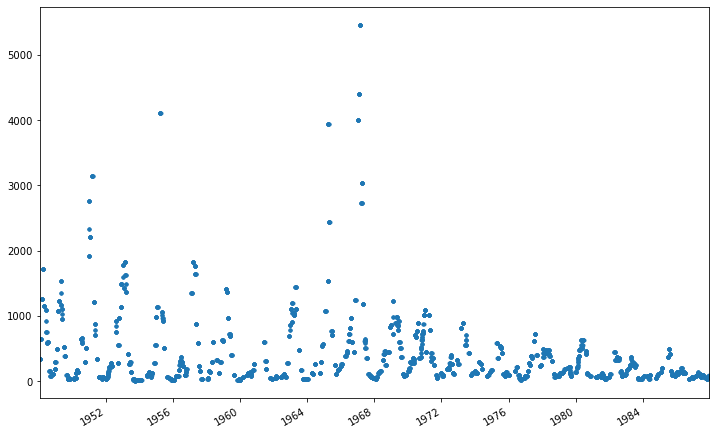

In [15]:
# What if we applied a rolling window?
import numpy as np
df2.resample("D").asfreq().rolling(10,min_periods=1).apply(np.nanmean).dropna().plot(style=".")

* We have another great option in pandas, which is the `interpolate()` function.
* interpolate fills na values in different ways depending upon the parameters you pass
* it actually has some specific time series benefits but only for higher frequency data (day or better)

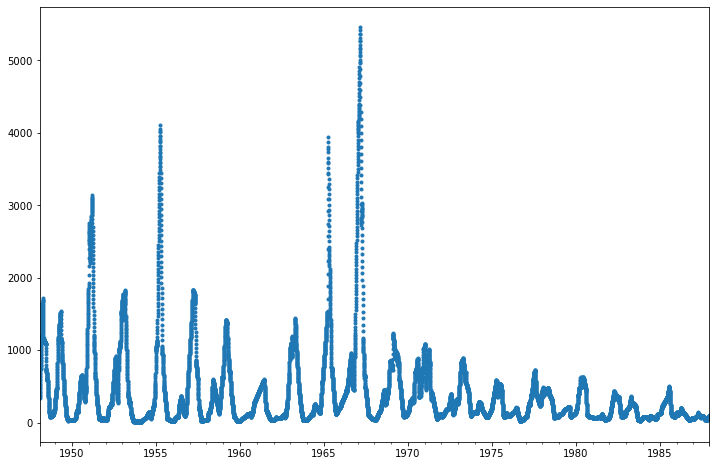

In [16]:
df2.resample("D").interpolate(method="linear").plot(style=".")

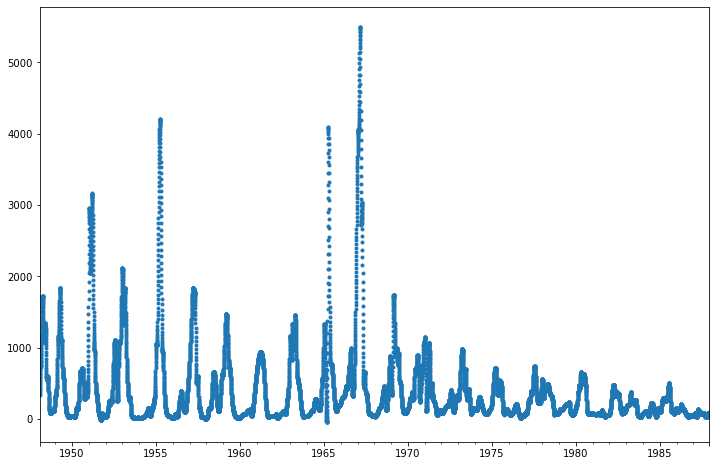

In [20]:
df2.resample("D").interpolate(method="polynomial", order=3).plot(style=".")

In [21]:
# what does interpolate work on?
import pandas as pd
import numpy as np
df=pd.read_csv("datasets/run.csv")
df.head()

,position_lat,position_long,timestamp,Power,heart_rate,enhanced_altitude
0,NaN,NaN,2019-08-21 03:24:16,201.0,119.0,294.0
1,504612085.0,-999397826.0,2019-08-21 03:24:17,210.0,120.0,308.0
2,504614191.0,-999397963.0,2019-08-21 03:24:18,216.0,122.0,314.4
3,504614830.0,-999398356.0,2019-08-21 03:24:19,231.0,122.0,319.2
4,504614846.0,-999398479.0,2019-08-21 03:24:20,231.0,121.0,312.2


In [22]:
df=df[0:10].append(df[20:100])
df=df.set_index(pd.to_datetime(df["timestamp"]))
df.head(20)

,position_lat,position_long,timestamp,Power,heart_rate,enhanced_altitude
timestamp,,,,,,
2019-08-21 03:24:16,NaN,NaN,2019-08-21 03:24:16,201.0,119.0,294.0
2019-08-21 03:24:17,504612085.0,-999397826.0,2019-08-21 03:24:17,210.0,120.0,308.0
2019-08-21 03:24:18,504614191.0,-999397963.0,2019-08-21 03:24:18,216.0,122.0,314.4
2019-08-21 03:24:19,504614830.0,-999398356.0,2019-08-21 03:24:19,231.0,122.0,319.2
2019-08-21 03:24:20,504614846.0,-999398479.0,2019-08-21 03:24:20,231.0,121.0,312.2
2019-08-21 03:24:21,504615114.0,-999398697.0,2019-08-21 03:24:21,234.0,120.0,309.6
2019-08-21 03:24:22,504615254.0,-999398935.0,2019-08-21 03:24:22,261.0,119.0,306.6
2019-08-21 03:24:23,504615283.0,-999399273.0,2019-08-21 03:24:23,283.0,119.0,304.0
2019-08-21 03:24:24,504615385.0,-999399615.0,2019-08-21 03:24:24,287.0,119.0,302.4


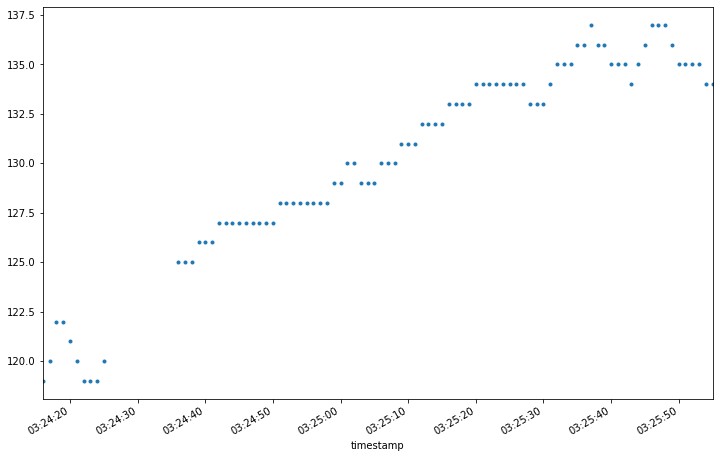

In [23]:
df["heart_rate"].plot(style=".")

In [24]:
df.resample("1s").interpolate(method="time").head(20)

,position_lat,position_long,timestamp,Power,heart_rate,enhanced_altitude
timestamp,,,,,,
2019-08-21 03:24:16,NaN,NaN,2019-08-21 03:24:16,201.000000,119.000000,294.000000
2019-08-21 03:24:17,504612085.0,-9.993978e+08,2019-08-21 03:24:17,210.000000,120.000000,308.000000
2019-08-21 03:24:18,504614191.0,-9.993980e+08,2019-08-21 03:24:18,216.000000,122.000000,314.400000
2019-08-21 03:24:19,504614830.0,-9.993984e+08,2019-08-21 03:24:19,231.000000,122.000000,319.200000
2019-08-21 03:24:20,504614846.0,-9.993985e+08,2019-08-21 03:24:20,231.000000,121.000000,312.200000
2019-08-21 03:24:21,504615114.0,-9.993987e+08,2019-08-21 03:24:21,234.000000,120.000000,309.600000
2019-08-21 03:24:22,504615254.0,-9.993989e+08,2019-08-21 03:24:22,261.000000,119.000000,306.600000
2019-08-21 03:24:23,504615283.0,-9.993993e+08,2019-08-21 03:24:23,283.000000,119.000000,304.000000
2019-08-21 03:24:24,504615385.0,-9.993996e+08,2019-08-21 03:24:24,287.000000,119.000000,302.400000


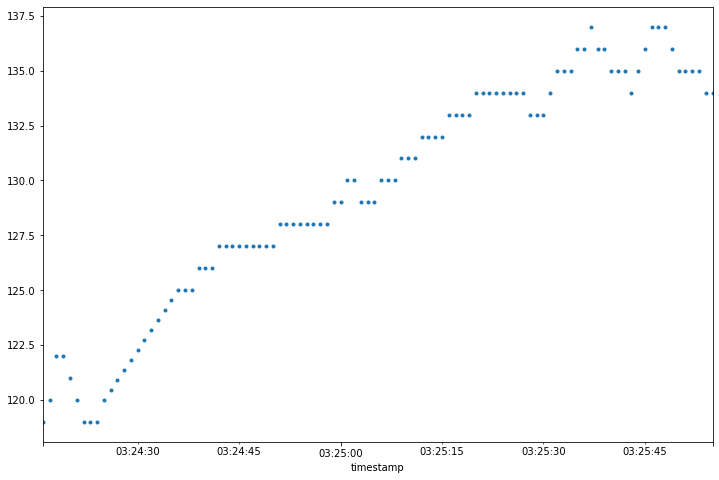

In [25]:
df.resample("1s").interpolate(method="time")["heart_rate"].plot(style=".")

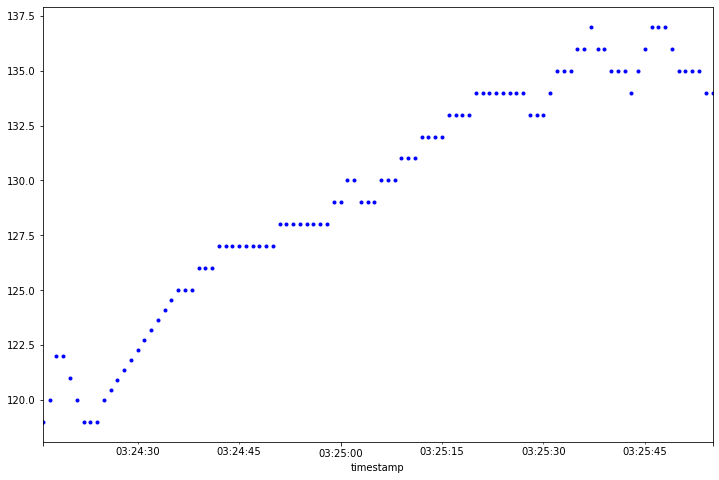

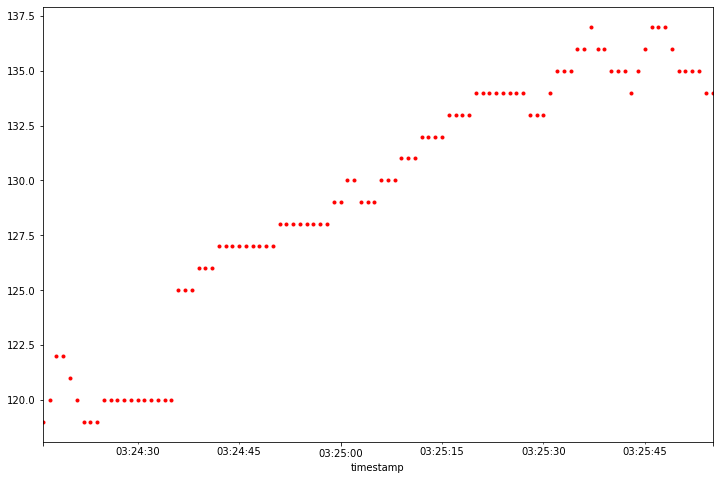

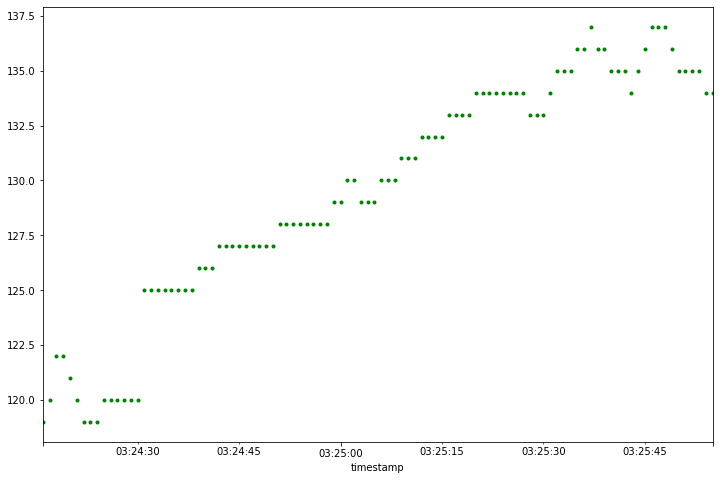

In [26]:
import matplotlib.pyplot as plt
df.resample("1s").interpolate(method="time")["heart_rate"].plot(style="b.")
plt.figure()
df.resample("1s").fillna(method="ffill")["heart_rate"].plot(style="r.")
plt.figure()
df.resample("1s").fillna(method="nearest")["heart_rate"].plot(style="g.")